<a href="https://colab.research.google.com/github/ghazalna/Falcon9-Landing-Predictor/blob/main/LogisticRegression_Falcon9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **The Data**

In [1]:
from google.colab import files

In [2]:
uploaded=files.upload()

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


In [3]:
import pandas as pd


In [4]:
df=pd.read_csv('preprocessed_dataset.csv')

In [5]:
df

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6123.547647,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,2,1,1,1,5.0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15600.000000,3,1,1,1,5.0,13,1,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15600.000000,6,1,1,1,5.0,12,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15600.000000,3,1,1,1,5.0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### **Exploratory Data Analysis**

### **Missing Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PayloadMass                          90 non-null     float64
 1   Flights                              90 non-null     int64  
 2   GridFins                             90 non-null     int64  
 3   Reused                               90 non-null     int64  
 4   Legs                                 90 non-null     int64  
 5   Block                                90 non-null     float64
 6   ReusedCount                          90 non-null     int64  
 7   Class                                90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     int64  
 9   Orbit_GEO                            90 non-null     int64  
 10  Orbit_GTO                            90 non-null     int64  
 11  Orbit_HEO                         

In [27]:
from sklearn import preprocessing

In [28]:
transform = preprocessing.StandardScaler()

### **Machine Learning Prediction**

### **LogisticRegression**

In [29]:
X= df.drop('Class', axis=1)
y= df['Class']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20 ,random_state=101)

In [32]:
y_test.shape

(18,)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [34]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)

In [35]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}

In [36]:
logreg_cv = GridSearchCV(logmodel, parameters, cv=10)

In [37]:
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [38]:
print("tuned hyperparameters (best parameters): ", logreg_cv.best_params_)
print("accuracy: ", logreg_cv.best_score_)

tuned hyperparameters (best parameters):  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy:  0.9017857142857142


In [39]:
predictions = logreg_cv.predict(X_test)

In [40]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [41]:
y_test

50    0
6     1
51    0
54    1
53    1
69    1
32    1
31    1
21    1
88    1
43    1
47    0
3     0
1     0
74    0
16    1
45    0
25    1
Name: Class, dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test,predictions)

array([[ 7,  0],
       [ 1, 10]])

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test , predictions, normalize=False)

17

In [46]:
accuracy_score(y_test , predictions, normalize=True)

0.9444444444444444

In [47]:
from sklearn.metrics import classification_report

In [48]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.91      0.95        11

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [66]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

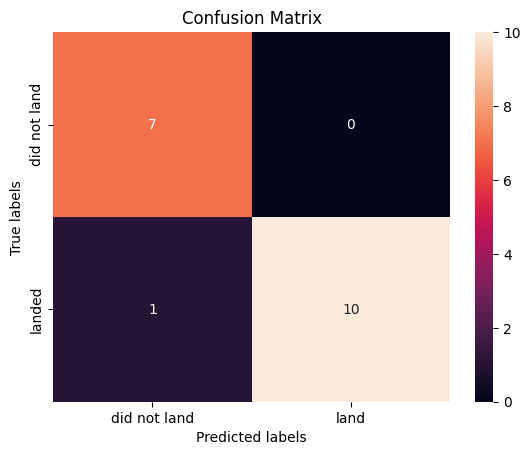

In [71]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [72]:
import pickle

In [73]:
pickle.dump(logreg_cv,open('LogisticRegression.pkl','wb'))